# Brownian motion (Wiener process)
___

A 1-dimensional Brownian motion $B(t)$ is a stochastic process satisfying the following four conditions:
1. $B(0) = 0 \,\, a.s.$
1. For any $0 \le s < t$, $B(t) - B(s)$ is normally distributed with mean $0$ and variance $t-s$.
1. $B(t)$ has independent increments.
1. Almost all sample paths of $B(t)$ is continuous.

Let $B_1(t), B_2(t), \dots B_n(t)$ be n independent Brownian motions. A n-dimensional Brownian motion $B(t)$ is the following:
$$B(t) = (B_1(t), B_2(t), \dots , B_n(t)).$$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

## sample time equally
Strictly, Brownian motions are not bounded variation.
___

In [2]:
def simple_brownian(step, dim=1, delta=1):
    nd = np.hstack((np.zeros((dim, 1)), np.random.randn(dim, step-1) * np.sqrt(delta)))
    motion = np.cumsum(nd, axis=1)
    if dim == 1:
        motion = motion[0]
    return motion

### 1 dimension

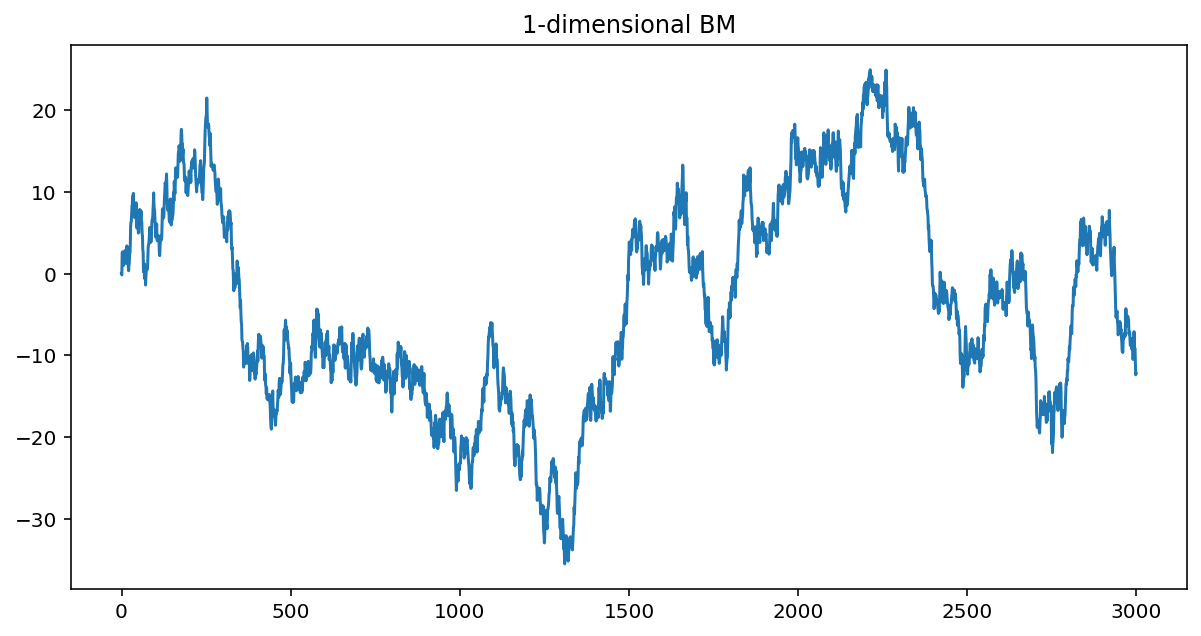

In [4]:
step = 3000

plt.figure(figsize=(10, 5))

y = simple_brownian(step)

plt.plot(y)
plt.title("1-dimensional BM")
plt.show()

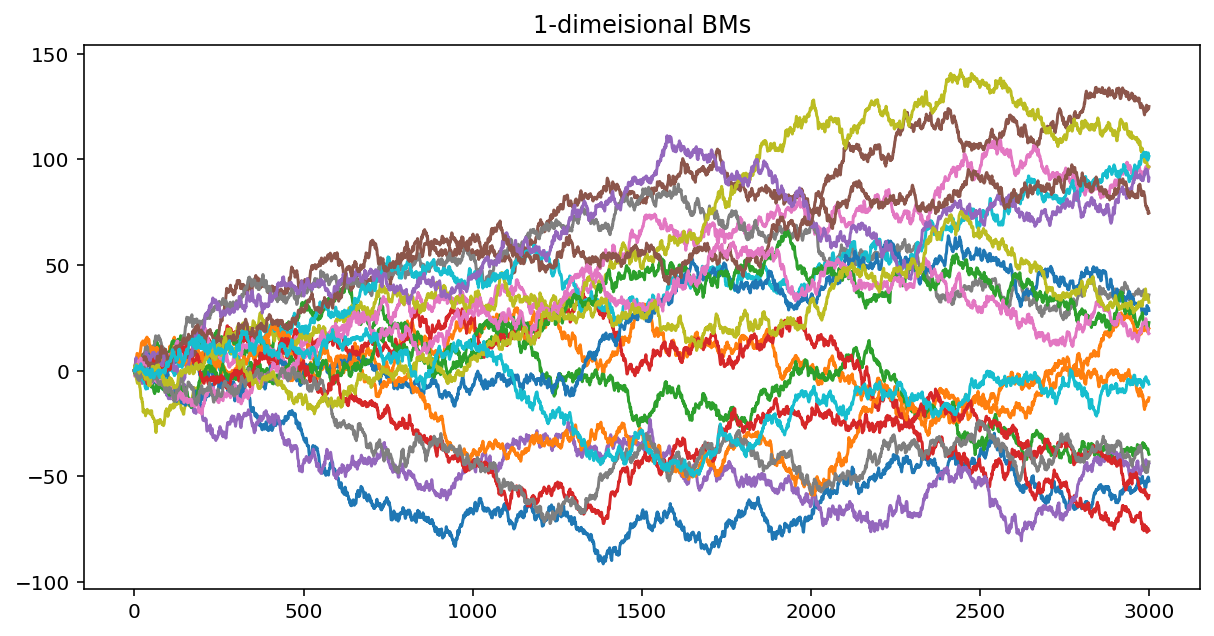

In [5]:
step = 3000
num = 20

plt.figure(figsize=(10, 5))

for _ in range(num):
    y = simple_brownian(step)
    plt.plot(y)

plt.title("1-dimeisional BMs")
plt.show()

### 2 dimension

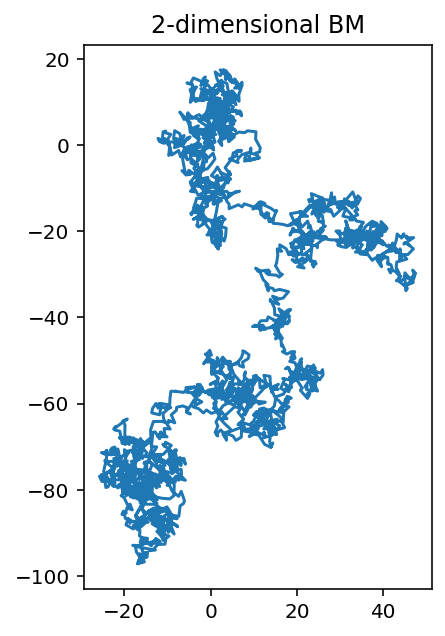

In [6]:
step = 3000
dim = 2

plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box') # equalize the scales of x-axis and y-axis

x, y = simple_brownian(step, dim)
plt.plot(x, y)
plt.title("2-dimensional BM")
plt.show()

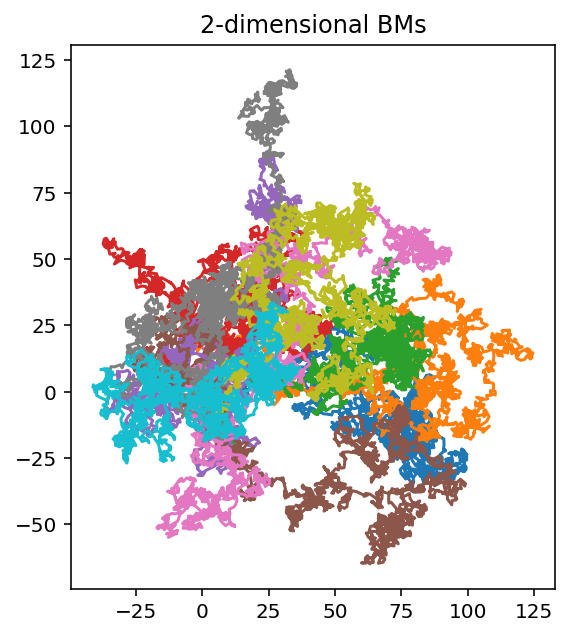

In [7]:
step = 3000
dim = 2
num = 10

plt.figure(figsize=(5, 5))
plt.gca().set_aspect('equal', adjustable='box')

for _ in range(num):
    x, y = simple_brownian(step, dim)
    plt.plot(x, y)

plt.title("2-dimensional BMs")
plt.show()

### 3 dimension

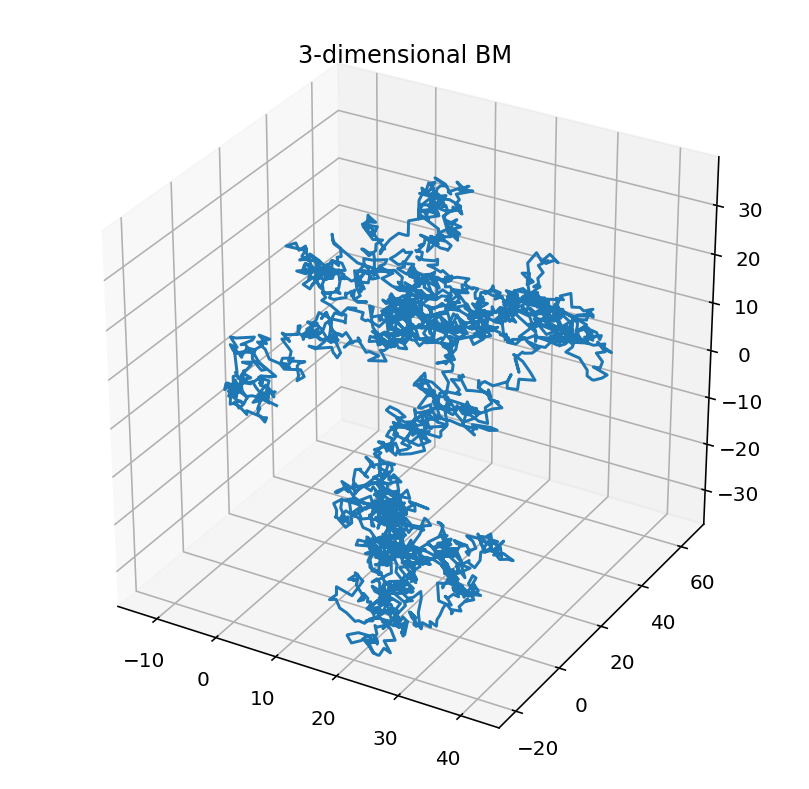

In [10]:
from mpl_toolkits.mplot3d import Axes3D

step = 3000
dim = 3

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x, y, z = simple_brownian(step, dim)
ax.plot(x, y, z)
ax.set_title("3-dimensional BM")
plt.show()

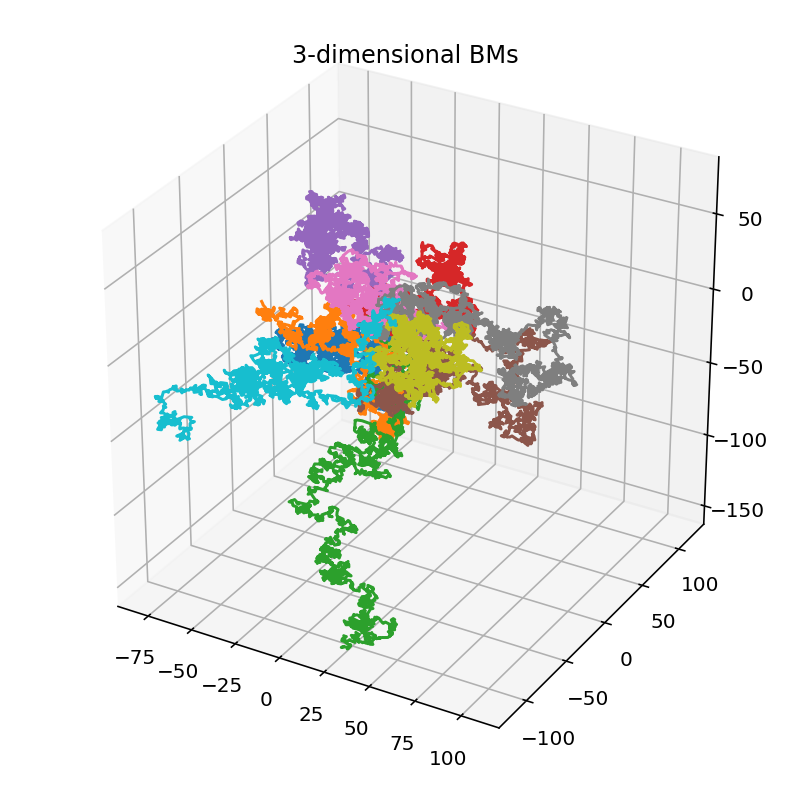

In [11]:
step = 3000
dim = 3
num = 10

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for _ in range(num):
    x, y, z = simple_brownian(step, dim)
    ax.plot(x, y, z)
ax.set_title("3-dimensional BMs")
plt.show()

## Recurrence of Brownian motion
Fact: 1 dimensional Brownian motions have the recurrence, but 2 or more dimensional Brownian motions don't.
However, 2 dimensional Brownian motions have the *neiborhood recurrence*. (3 or more do not.)
___

### 1 dimension

In [3]:
step = int(1e+7)
num = 100

ys = simple_brownian(step, num)
ys_next = np.hstack((np.zeros((num, 1)), ys))[:, :-1]

products = ys * ys_next
cross_num = np.sum(np.any(products < 0, axis=1))
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 100
Probability: 1.0


### 2 dimension

In [5]:
%%time
step = int(1e+7)
dim = 2
num = 100

cross_num = 0
for n in range(num):
    nd = np.hstack((np.zeros((dim, 1)), np.random.randn(dim, step-1)))
    motion = np.cumsum(nd, axis=1)
    quatients = motion[:, 2:] / nd[:, 2:]
    n_q = quatients / np.max(quatients, axis=0)
    diff = abs(n_q[0] - n_q[1])
    cross_num += np.any(diff < 1e-3)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 100
Cross number: 100
Probability: 1.0
Wall time: 2min 29s


### Law of the iterated logarithm


$$ \limsup_{t \to \infty} \frac{B(t)}{\sqrt{2t\log \log t}} = 1 \,\,\, a.s.,$$
or
$$ \limsup_{t \to +0} \frac{B(t)}{\sqrt{2t\log \log (1/t)}} = 1 \,\,\, a.s.,$$

where $B(t)$ is a 1-dimensional brownian motion.

Same as simple random walk. See `simple-random-walk.ipynb`.

## Arc-sine law of Lévy
___
> **Theorem**  
> Let $L_t = \int^t_0 \text{sgn}^+(B(s))\, ds = \int^t_0 1_{\{(B(s)) > 0\}}\, ds $ be the amount of time that a ?Browinan motion is positive during $[0, t]$. Then,
> $$ P(L_t \le \tau)\, = \, \frac{2}{\pi}\arcsin \sqrt{\frac{\tau}{t}}, \,\,\, 0 \le \tau \le t,$$ or
> $$ P(L_t \in d\tau)\, = \, \frac{1}{\pi \sqrt{\tau (t - \tau)}}.$$

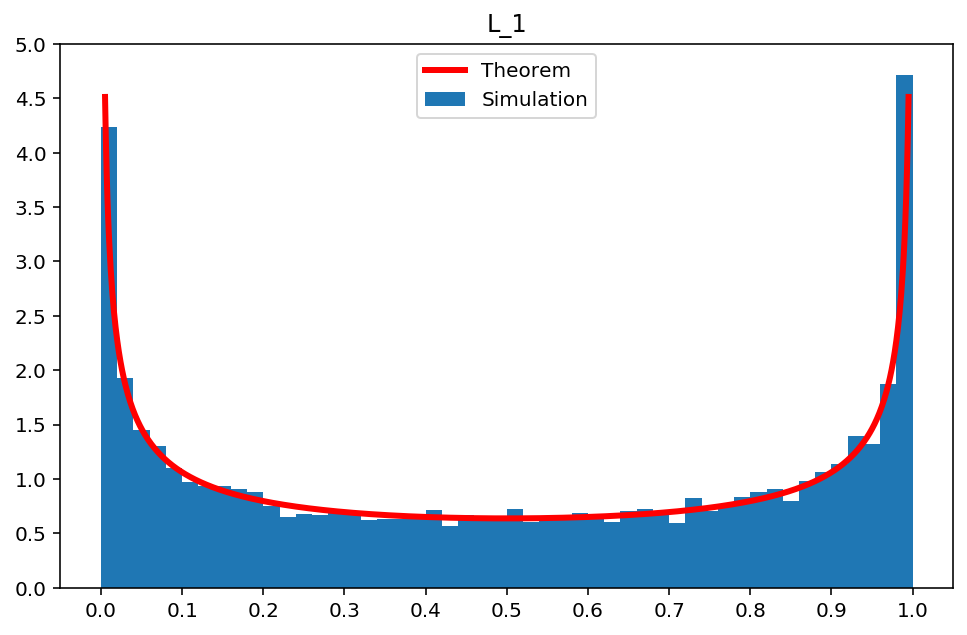

CPU times: user 1.17 s, sys: 234 ms, total: 1.41 s
Wall time: 1.51 s


In [5]:
%%time
step = 1000
num = 10000

diffs = np.random.randn(num, step+1).astype(np.float32) * np.sqrt(1 / step)
diffs[:, 0] = 0.
bms = np.cumsum(diffs, axis=1)
cal_positive = np.mean(bms[:, 1:] > 0, axis=1)
x = np.linspace(0.005, 0.995, 990+1)
thm_positive = 1 / np.pi * 1 / np.sqrt(x * (1 - x))

plt.figure(figsize=(8, 5))
plt.hist(cal_positive, bins=50, density=True, label="Simulation")
plt.plot(x, thm_positive, linewidth=3, color='r', label="Theorem")
plt.xticks(np.linspace(0, 1, 10+1))
plt.yticks(np.linspace(0, 5, 10+1))
plt.title("L_1")
plt.legend()
plt.show()

for more details, see [Google Colaboratory](https://colab.research.google.com/drive/1TMjw2ugVvvgp6dh5c51rYABBGOSFjQzX).

## Passage time
___
> **Theorem (Reflection Principle)**  
> Let $T_b = \inf \{ \, t \, | \, B(t) = b \, \}, \,\, b \in \mathbb{R}$ and $t>0.$ Then,
> $$ P(T_b < t)=  P(\max_{0\le s \le |b|} B(s) \ge |b|) = 2 P(B(t) > |b|) = \sqrt{\frac{2}{\pi}}\int ^\infty_{bt^{-1/2}} e^{-x^2 / 2} \, dx,$$
> or
> $$P(T_b  \in dt) = \frac{|b|}{\sqrt{2 \pi t^3}} e^{-b^2/2t}\,  dt.$$

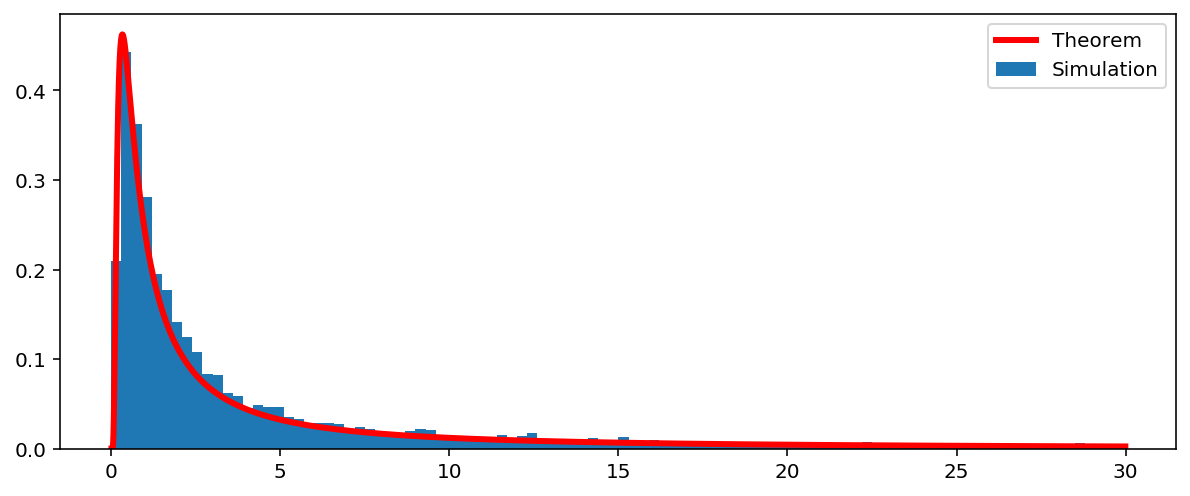

CPU times: user 15.2 s, sys: 3.39 s, total: 18.6 s
Wall time: 18.8 s


In [16]:
%%time
b = 1
delta = 0.01
step = 10000
num = 10000

motions = simple_brownian(step, num, delta)
t_b = []
for motion in motions:
    for i, coord in enumerate(motion):
        if coord >= b:
            t_b.append(i * delta)
            break
            
plt.figure(figsize=(10, 4))
plt.hist(t_b, bins=100, density=True, range=(0, 30), label="Simulation")
t = np.arange(1*delta, 30, delta)
theo = b / np.sqrt(2 * np.pi * t**3) * np.exp(-b**2 / (2 * t))
plt.plot(t, theo, color="r", linewidth=3, label="Theorem")
plt.legend()
plt.show()

 > $$ P(\max_{0\le s \le t} \in db) = \sqrt{\frac{2}{\pi t}} e^{-b^2/2t} \,db\,\,\, (b > 0).$$

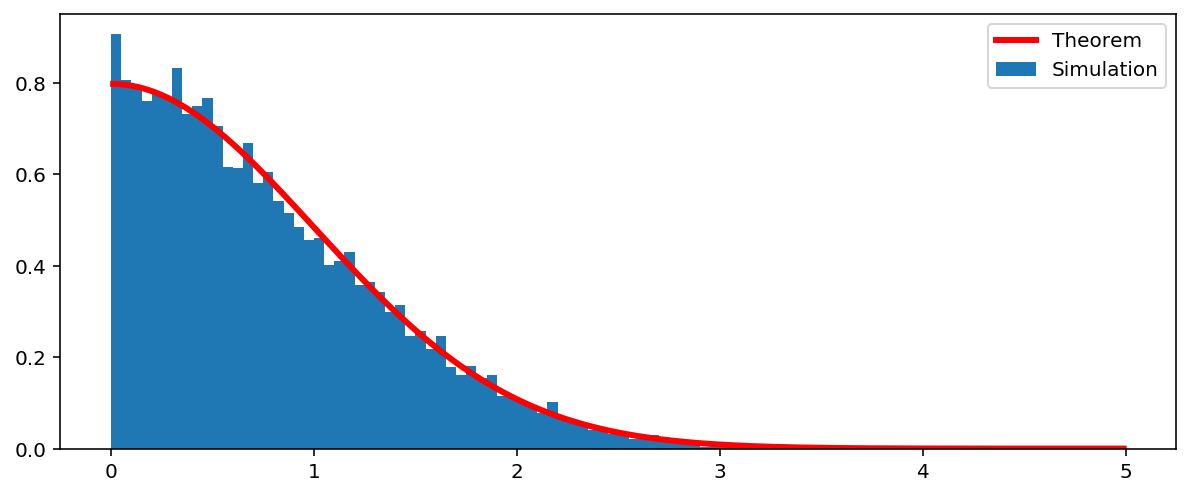

CPU times: user 6.64 s, sys: 3.44 s, total: 10.1 s
Wall time: 10.2 s


In [33]:
%%time
t = 1
step = 10000
delta = t / step
num = 10000

motions = simple_brownian(step, num, delta)
maxes = np.max(motions, axis=1)

plt.figure(figsize=(10, 4))
plt.hist(maxes, bins=100, density=True, range=(0, 5), label="Simulation")
b = np.arange(0.01, 5, 0.01)
theo = np.sqrt(2 / (np.pi * t)) * np.exp(-  b**2 / (2*t))
plt.plot(b, theo, color="r", linewidth=3, label="Theorem")
plt.legend()
plt.show()

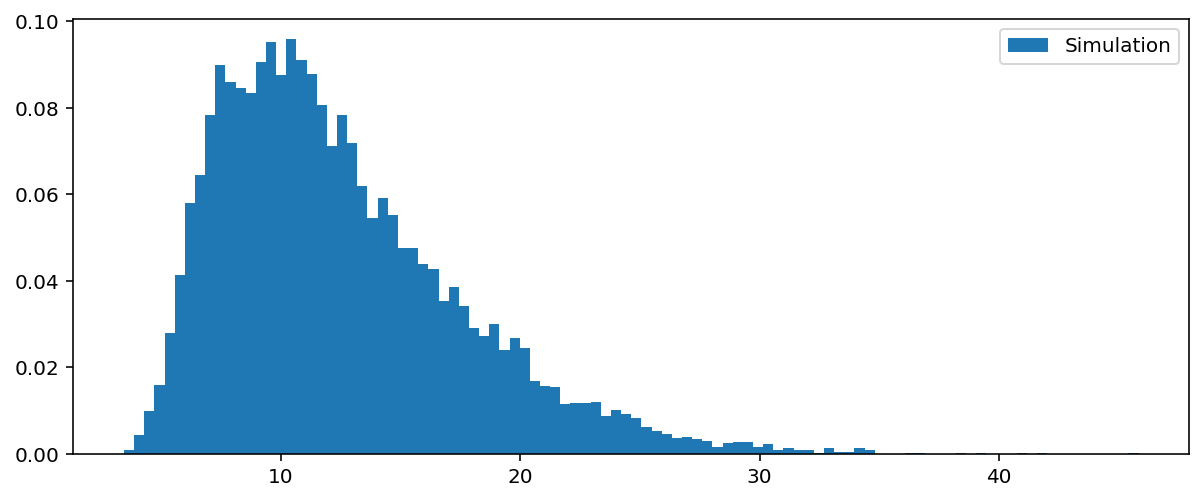

CPU times: user 7.03 s, sys: 4.42 s, total: 11.5 s
Wall time: 12.1 s


In [27]:
%%time
t = 100
step = 10000
delta = t / step
num = 10000

motions = simple_brownian(step, num, delta)
maxes = np.max(np.abs(motions), axis=1)

plt.figure(figsize=(10, 4))
plt.hist(maxes, bins=100, density=True, label="Simulation")
plt.legend()
plt.show()

# Bessel process
___

A Bessel process $L(t)$ is a stochastic process satisfying the following equation:
$$ L_{n-1}(t) \, = \, \sqrt{ B_1(t)^2 + B_2(t)^2 + \dots + B_n(t)^2 } , $$
where $B(t) = (B_1(t), B_2(t), \dots , B_n(t)) $ is a n-dimensional Brownian motion.
Furthermore, it satisfies the following stochastic differential eguation:
$$ dX(t)\, = \,dB(t) + \frac{n-1}{2}\frac{1}{X(t)}dt. $$

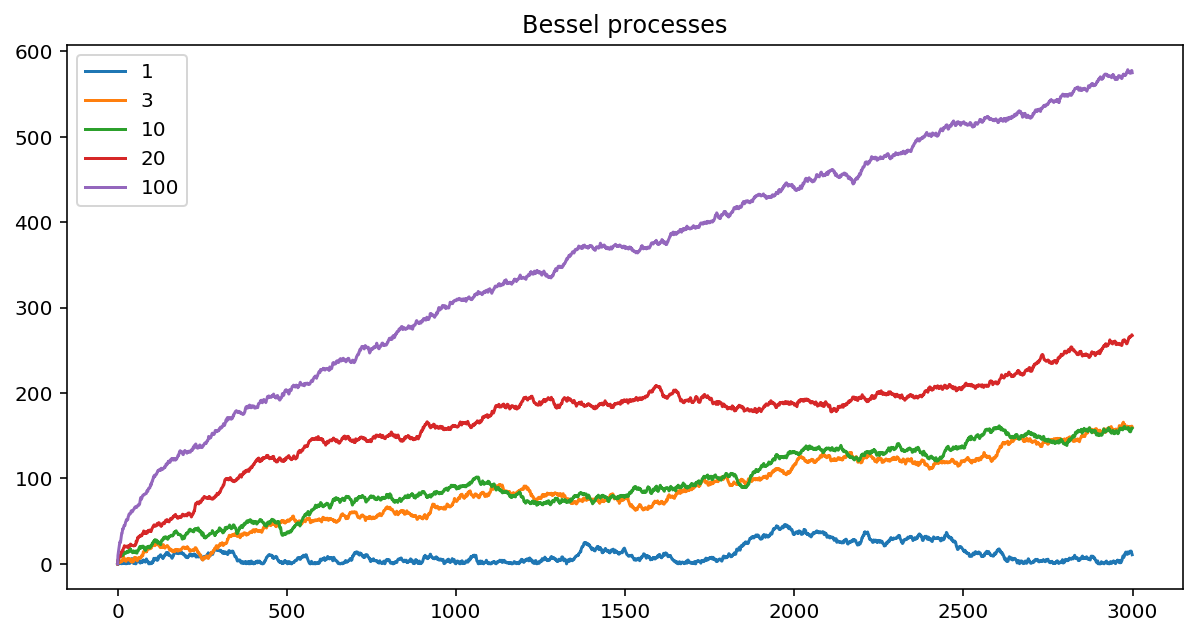

In [12]:
step = 3000
ns = [1, 3, 10, 20, 100]

plt.figure(figsize=(10, 5))


for n in ns:
    b = simple_brownian(step, n)
    if n == 1:
        y = np.abs(b)
    else:
        y = np.linalg.norm(b, axis=0)
    plt.plot(y, label=f'{n}')
plt.title("Bessel processes")
plt.legend()
plt.show()